In [2]:
import featuretools as ft

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
clean_data_all_college30=pd.read_csv('../Data/final_data_combined_edulix_yocket.csv')

In [178]:
clean_data_all_college30.describe()

,gre_score,gre_score_quant,gre_score_verbal,ranking,test_score_toefl,undergraduation_score,work_ex,year_applying
count,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000
mean,313.986488,162.576971,151.409516,52.041309,101.712142,2.955546,15.242978,2016.245633
std,8.250369,6.318221,4.294014,37.090168,10.410768,0.492680,11.555471,2.341539
min,260.000000,107.000000,132.000000,1.000000,0.000000,0.000000,0.000000,2011.000000
25%,308.000000,159.000000,149.000000,23.000000,98.000000,2.610000,10.000000,2014.000000
50%,314.000000,163.000000,152.000000,48.000000,104.000000,3.000000,14.000000,2016.000000
75%,320.000000,167.000000,154.000000,64.000000,107.000000,3.340000,18.000000,2019.000000
max,340.000000,189.000000,170.000000,150.000000,120.000000,4.000000,153.000000,2021.000000


In [179]:
#filtering out outlier records with quant scores less than 130 which is not possible
clean_data_all_college30=clean_data_all_college30.loc[clean_data_all_college30['gre_score_quant']>=130,:]

In [180]:
clean_data_all_college30.reset_index(drop=True,inplace=True)
#checking the stats of data after removing some outliers
clean_data_all_college30.describe()

,gre_score,gre_score_quant,gre_score_verbal,ranking,test_score_toefl,undergraduation_score,work_ex,year_applying
count,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000
mean,314.009367,162.599942,151.409424,52.043839,101.717845,2.955795,15.248407,2016.244786
std,8.183946,6.229763,4.294855,37.096575,10.397437,0.492508,11.554282,2.341539
min,272.000000,132.000000,132.000000,1.000000,0.000000,0.000000,0.000000,2011.000000
25%,308.000000,159.000000,149.000000,23.000000,98.000000,2.610000,10.000000,2014.000000
50%,314.000000,163.000000,152.000000,48.000000,104.000000,3.000000,14.000000,2016.000000
75%,320.000000,167.000000,154.000000,64.000000,107.000000,3.340000,18.000000,2019.000000
max,340.000000,189.000000,170.000000,150.000000,120.000000,4.000000,153.000000,2021.000000


In [181]:
#checking if we have distribution of admits and rejects across all universities to see
clean_data_all_college30.groupby(by=['university_name'])['status'].value_counts(normalize=True)*100

university_name                              status
carnegie mellon university                   Reject    68.211921
                                             Admit     31.788079
clemson university                           Admit     60.240964
                                             Reject    39.759036
george mason university                      Admit     63.035019
                                             Reject    36.964981
georgia institute of technology              Reject    89.304813
                                             Admit     10.695187
illinois institute of technology             Admit     69.883041
                                             Reject    30.116959
indiana university bloomington               Admit     68.903803
                                             Reject    31.096197
kansas state university                      Admit     54.945055
                                             Reject    45.054945
michigan technological university     

In [182]:
todict=clean_data_all_college30.groupby(by=['university_name'])['status'].value_counts(normalize=True)*100

In [183]:
accepts_rejects=todict.to_dict()

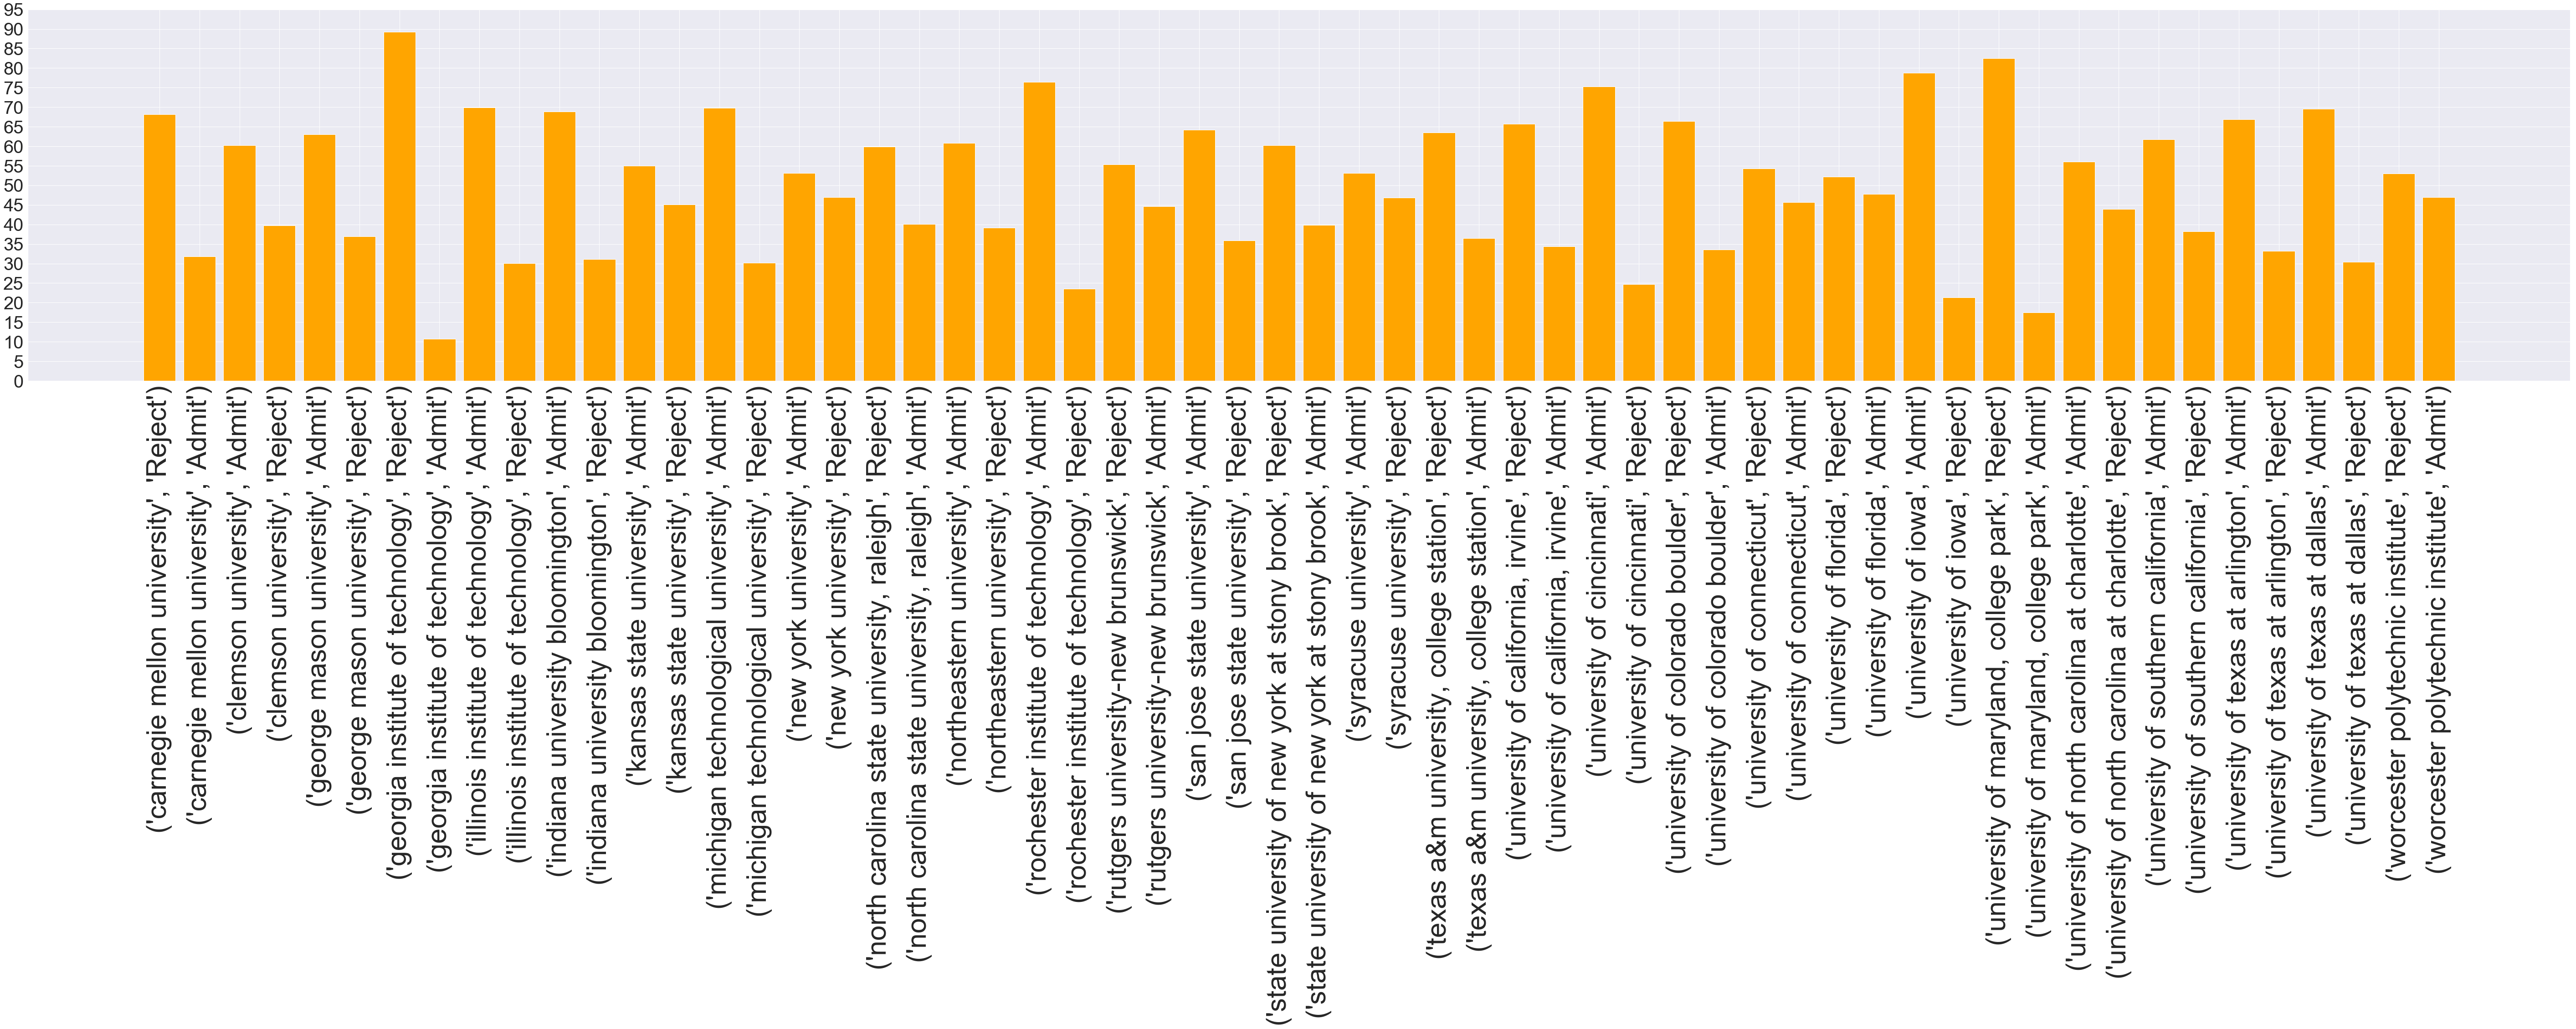

In [184]:
plt.figure(figsize=(100,15))
plt.bar(range(len(accepts_rejects)), list(accepts_rejects.values()), align='center', color=['Orange'])
plt.xticks(range(len(accepts_rejects)), list(accepts_rejects.keys()),rotation=90, fontsize=60)
plt.yticks(np.arange(0,100,5),fontsize=40)
plt.show()

#### On the available data that we have, IVY league Universities like CMU,GTech, Maryland have less acceptance rates in range 15-30% and other universities have more than 30% to 60% accepts data. Hence we can say that we have data with normal distribution

In [195]:
#mapping labels with 0 for Admit and 1 for Reject to check correlation and saving it 'target' feature
clean_data_all_college30['target']=clean_data_all_college30['status'].apply(lambda x:1 if x=='Admit' else 0)

C:\Users\navee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


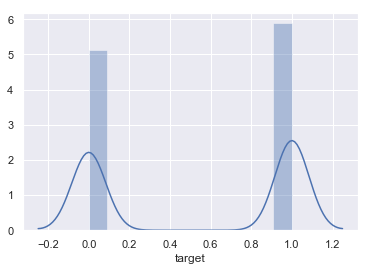

In [186]:
sns.distplot(clean_data_all_college30['target'])

<h5> Overall data is following normal distribution on both accepts and rejects <h5>

In [187]:
clean_data_all_college30.isna().sum()

gre_score                0
gre_score_quant          0
gre_score_verbal         0
ranking                  0
status                   0
student_name             0
term_applying            0
test_score_toefl         0
undergraduation_score    0
university_name          0
work_ex                  0
year_applying            0
target                   0
dtype: int64

In [188]:
clean_data_all_college30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10356 entries, 0 to 10355
Data columns (total 13 columns):
gre_score                10356 non-null float64
gre_score_quant          10356 non-null float64
gre_score_verbal         10356 non-null int64
ranking                  10356 non-null int64
status                   10356 non-null object
student_name             10356 non-null object
term_applying            10356 non-null object
test_score_toefl         10356 non-null float64
undergraduation_score    10356 non-null float64
university_name          10356 non-null object
work_ex                  10356 non-null float64
year_applying            10356 non-null int64
target                   10356 non-null int64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.0+ MB


In [189]:
numerical_data = clean_data_all_college30.select_dtypes(include = ['int64','float64'])
categorical_data = clean_data_all_college30.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [190]:
categorical_features

array(['status', 'student_name', 'term_applying', 'university_name'],
      dtype=object)

In [191]:
numerical_features

array(['gre_score', 'gre_score_quant', 'gre_score_verbal', 'ranking',
       'test_score_toefl', 'undergraduation_score', 'work_ex',
       'year_applying', 'target'], dtype=object)

In [192]:
labels=clean_data_all_college30['status'].unique().tolist()

In [193]:
labels

['Admit', 'Reject']

In [194]:
#checking correlation across all numerical features against our target variable
clean_data_all_college30.corr()['target'].sort_values(ascending=False)

target                   1.000000
ranking                  0.157697
undergraduation_score    0.112249
gre_score_quant          0.044477
gre_score                0.023991
test_score_toefl         0.006391
gre_score_verbal        -0.018800
year_applying           -0.025517
work_ex                 -0.126324
Name: target, dtype: float64

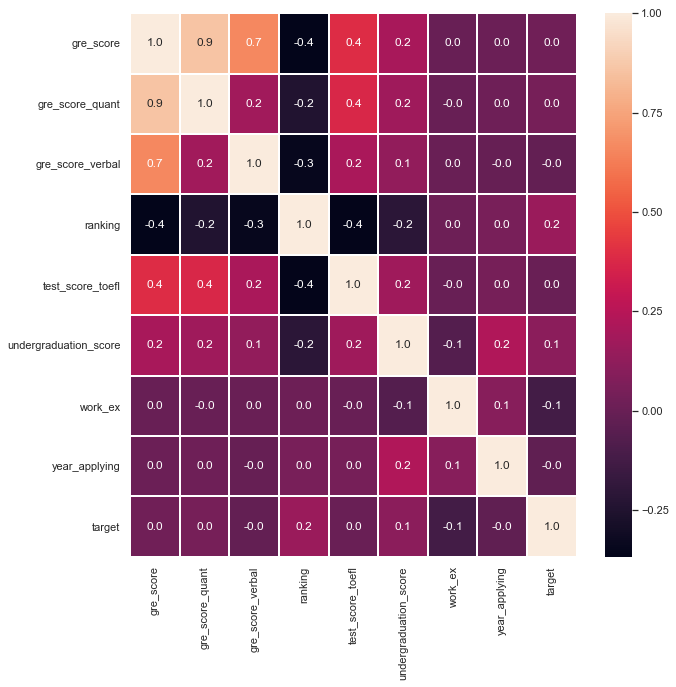

In [197]:
#checking for highly correlated features
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(clean_data_all_college30.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

### every feature except work_ex is showing a positive correlation which means higher numbers will fetch you admit

- gre_score and gre_quant are showing high collinearity, so we are dropping gre_score since we also have gre_verbal scores

In [198]:
gre_scores = clean_data_all_college30.pop('gre_score')

In [199]:
clean_data_all_college30.test_score_toefl=clean_data_all_college30.test_score_toefl.astype('int64')

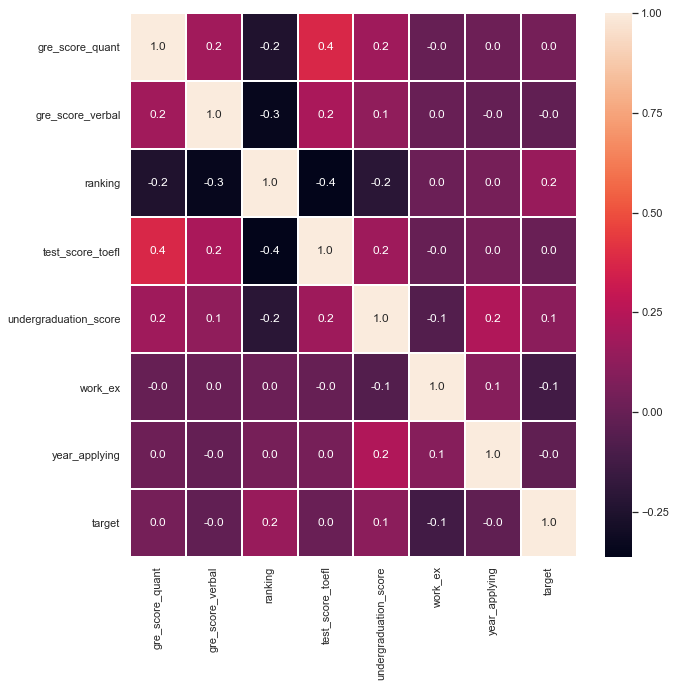

In [200]:
#checking for highly correlated features
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(clean_data_all_college30.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [201]:
#checking correlation across all numerical features against our target variable
clean_data_all_college30.corr()['target'].sort_values(ascending=False)

target                   1.000000
ranking                  0.157697
undergraduation_score    0.112249
gre_score_quant          0.044477
test_score_toefl         0.006848
gre_score_verbal        -0.018800
year_applying           -0.025517
work_ex                 -0.126324
Name: target, dtype: float64

- correlation says that college_ranking and undergrad_scores have more impact on decsion preceded by gre scores, toefl, year_applying

In [203]:
#to check how term(Fall,spring) effecting the decision, we will convert term to ordinal using one hot encoding
clean_data_all_college30['term_applying_spring']=pd.get_dummies(clean_data_all_college30['term_applying'],prefix='term_applying',drop_first=True)

In [204]:
clean_data_all_college30.drop(columns=['term_applying'],inplace=True)

In [205]:
#checking correlation across all numerical features against our target variable
clean_data_all_college30.corr()['target'].sort_values(ascending=False)

target                   1.000000
ranking                  0.157697
undergraduation_score    0.112249
term_applying_spring     0.048857
gre_score_quant          0.044477
test_score_toefl         0.006848
gre_score_verbal        -0.018800
year_applying           -0.025517
work_ex                 -0.126324
Name: target, dtype: float64

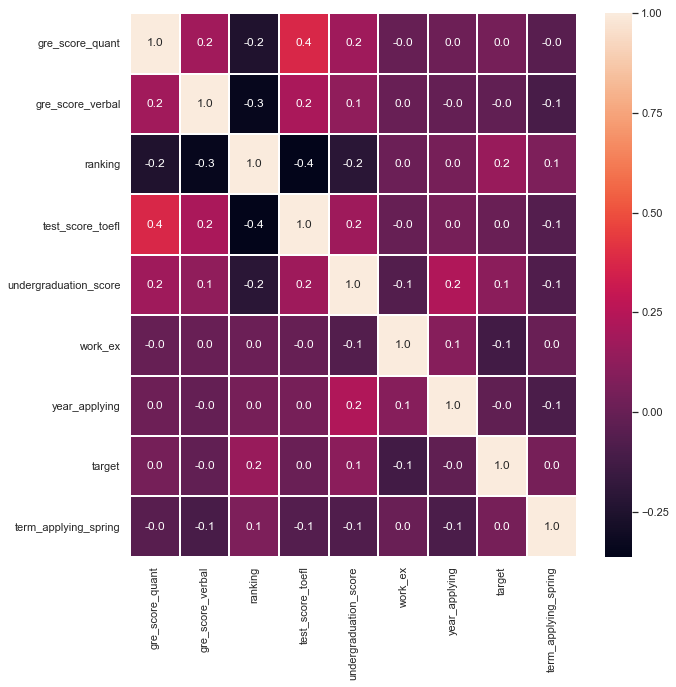

In [206]:
#checking for highly correlated features
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(clean_data_all_college30.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

C:\Users\navee\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


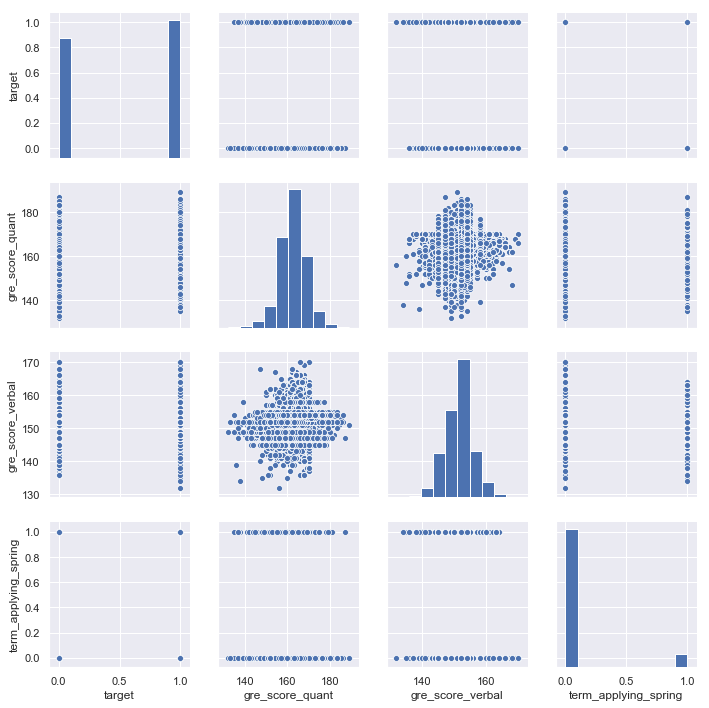

In [207]:
#scatterplot
sns.set()
cols = ['target','gre_score_quant','gre_score_verbal','term_applying_spring']
sns.pairplot(clean_data_all_college30[cols], size = 2.5)
plt.show();

In [209]:
#checking correlation across all numerical features against our target variable
clean_data_all_college30.corr()['target'].sort_values(ascending=False)

target                   1.000000
ranking                  0.157697
undergraduation_score    0.112249
term_applying_spring     0.048857
gre_score_quant          0.044477
test_score_toefl         0.006848
gre_score_verbal        -0.018800
year_applying           -0.025517
work_ex                 -0.126324
Name: target, dtype: float64

In [210]:
numerical_data = clean_data_all_college30.select_dtypes(include = ['int64','float64'])
categorical_data = clean_data_all_college30.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [211]:
categorical_features

array(['status', 'student_name', 'university_name'], dtype=object)

- status is our target variable, so we need not handle it
- we will not train our model on student_name
- we will use one-hot encoding to convert university_name field to numeric

In [217]:
clean_data_all_college30=clean_data_all_college30.join(pd.get_dummies(clean_data_all_college30['university_name'],prefix='university_name',drop_first=True))

In [218]:
numerical_features

array(['gre_score_quant', 'gre_score_verbal', 'ranking',
       'test_score_toefl', 'undergraduation_score', 'work_ex',
       'year_applying', 'target'], dtype=object)

In [219]:
#dropping 'target' column keeping only 'status' column
clean_data_all_college30.drop(columns=['target'],inplace=True)

In [220]:
clean_data_all_college30.to_csv('../Data/feature_engineeriing_all_college30.csv',index=False)